In [48]:
#Importing libraries
import pandas as pd
from tabulate import tabulate
%pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\denis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#importing the dataset and reading the first 10 rows
AdditionalDF = pd.read_csv('C:/Users/denis/OneDrive/Desktop/Thesis Project Stuff/Additional Data for Clustering.csv')
AdditionalDF.head(10)

,Time,Time Code,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Renewable electricity output (% of total electricity output) [EG.ELC.RNEW.ZS],...,"Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative) [SE.PRM.CUAT.MA.ZS]","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative) [SE.TER.CUAT.BA.FE.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+) [FX.OWN.TOTL.FE.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+) [FX.OWN.TOTL.MA.ZS]",Fossil fuel energy consumption (% of total) [EG.USE.COMM.FO.ZS],"Electricity production from renewable sources, excluding hydroelectric (kWh) [EG.ELC.RNWX.KH]","Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS],Interest payments (% of revenue) [GC.XPN.INTP.RV.ZS],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]"
0,2021,YR2021,Afghanistan,AFG,34.9,20,97.7,97.1,99.5,78.2344746063241,...,19.3400001525879,1.14999997615814,4.7,14.79,..,77910000,..,122.740707113011,..,5.13320340824963
1,2021,YR2021,Albania,ALB,83.6,41.9,100,100,100,..,...,98.1187286376953,19.4729270935059,45.69,42.59,56.22,41710000,81.9201331889469,113.324263171913,6.50561490957785,2.04147163139545
2,2021,YR2021,Algeria,DZA,99.7,0.1,99.8,99.3,100,0.913584728890971,...,..,..,31.19,56.83,100,769110000,..,99.9483246787706,..,7.22606307415477
3,2021,YR2021,American Samoa,ASM,..,0.4,..,..,..,3.8725406815218,...,..,..,..,..,..,6830000,..,..,..,..
4,2021,YR2021,Andorra,AND,100,18.4,100,100,100,93.3403907227408,...,..,..,..,..,..,18160000,..,..,..,..
5,2021,YR2021,Angola,AGO,49.8,52.9,48.2,..,75,91.7136027244744,...,84.792854309082,0,..,..,45.48,2902750000,..,78.9739466519861,..,25.7542948841891
6,2021,YR2021,Antigua and Barbuda,ATG,100,0.9,100,100,100,5.65579264886605,...,86.7722625732422,12.7448997497559,..,..,..,20250000,..,..,..,2.06299638545334
7,2021,YR2021,Argentina,ARG,99.9,9.2,100,100,100,25.5361113468556,...,..,..,73.75,69.56,87.4,13880960000,..,96.945271229393,7.83661395979877,..
8,2021,YR2021,Armenia,ARM,98,9.1,100,100,99.9,30.0380758979566,...,99.8019409179688,29.2583923339844,52.18,59.38,78.22,165700000,60.080359768226,107.857008842587,10.9441131132779,7.18483629443371
9,2021,YR2021,Aruba,ABW,..,8.8,100,100,100,14.7971787957078,...,..,..,..,..,..,156930000,..,105.535490355427,..,..


In [ ]:
#Identifying data types and missing values in one table
#Get the data types
dtypes = AdditionalDF.dtypes

#Determining the number of missing values in each column
missingValues = AdditionalDF.isna().sum()

#Creating a new DataFrame for combined information
info = pd.DataFrame({'Variable Name': dtypes.index,'Data Type': dtypes.values,'Missing Values': missingValues.values})

#Converting DataFrame to table format with right alignment
table = tabulate(info, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))
print(table)

+---------------------------------------------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                                                               Variable Name | Data Type | Missing Values |
+---------------------------------------------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                                                                        Time |    object |              3 |
|                                                                                                                                   Time Code |    object |              5 |
|                                                                                                                                Countr

In [30]:
#removing countries that are not part of prechosen 106 countries
specifiedCountries = ['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria', 
                      'Bangladesh', 'Barbados', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 
                      'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 
                      'Congo, Dem. Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 
                      'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Honduras', 
                      'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kosovo',
                      'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
                      'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 
                      'North Macedonia', 'Norway', 'Pakistan', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
                      'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 
                      'Solomon Islands', 'South Africa', 'Spain', 'Sri Lanka', 'St. Lucia', 'Suriname', 'Sweden', 'Switzerland', 'Tajikistan', 
                      'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Turkiye', 'Uganda', 'United Kingdom', 'United States', 'Uruguay']

# Filter the data to include only the specified countries
AdditionalDF = AdditionalDF[AdditionalDF['Country Name'].isin(specifiedCountries)]

In [31]:
#Displaying the count of unique items in the 'Country Name' column
print(f'Unique items in Country Name column: {AdditionalDF["Country Name"].nunique()}')   

Unique items in Country Name column: 106


In [32]:
AdditionalDF = AdditionalDF.rename(columns={"Country Name": "Country", "Country Code": "Code"})

In [33]:
#dropping characters inside [ ] in the column names
AdditionalDF.columns = AdditionalDF.columns.str.replace(r'\[.*?\]', '', regex=True)

In [ ]:
#Identifying data types and missing values in one table
#Get the data types
dtypes = AdditionalDF.dtypes

#Determining the number of missing values in each column
missingValues = AdditionalDF.isna().sum()

#Creating a new DataFrame for combined information
info = pd.DataFrame({'Variable Name': dtypes.index,'Data Type': dtypes.values,'Missing Values': missingValues.values})

#Converting DataFrame to table format with right alignment
table = tabulate(info, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))
print(table)

+-------------------------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                                           Variable Name | Data Type | Missing Values |
+-------------------------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                                                    Time |  category |              0 |
|                                                                                                                 Country |  category |              0 |
|                                                    Access to clean fuels and technologies for cooking (% of population) |   float64 |            112 |
|                                                      Renewable energy consumptio

In [35]:
#drop unnecessary columns
AdditionalDF = AdditionalDF.drop(columns=['Code', 'Time Code'])

In [37]:
#convert Country coulm into categorical data type
AdditionalDF['Country'] = AdditionalDF['Country'].astype('category')

#convert time into categorical data type
AdditionalDF['Time'] = AdditionalDF['Time'].astype('category')

In [39]:
#convert all object columns into numeric data type
for col in AdditionalDF.select_dtypes(include=['object']).columns:
    AdditionalDF[col] = pd.to_numeric(AdditionalDF[col], errors='coerce')


In [41]:
AdditionalDF.head(10)

,Time,Country,Access to clean fuels and technologies for cooking (% of population),Renewable energy consumption (% of total final energy consumption),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Renewable electricity output (% of total electricity output),Electric power consumption (kWh per capita),"Labor force, female (% of total labor force)",...,"Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",Fossil fuel energy consumption (% of total),"Electricity production from renewable sources, excluding hydroelectric (kWh)","Central government debt, total (% of GDP)",Gross national expenditure (% of GDP),Interest payments (% of revenue),"Inflation, consumer prices (annual %)"
1,2021,Albania,83.6,41.9,100.0,100.0,100.0,NaN,2509.899825,45.035146,...,98.118729,19.472927,45.69,42.59,56.22,4.171000e+07,81.920133,113.324263,6.505615,2.041472
7,2021,Argentina,99.9,9.2,100.0,100.0,100.0,25.536111,2942.910775,42.404131,...,NaN,NaN,73.75,69.56,87.40,1.388096e+10,NaN,96.945271,7.836614,NaN
8,2021,Armenia,98.0,9.1,100.0,100.0,99.9,30.038076,2262.093643,50.931288,...,99.801941,29.258392,52.18,59.38,78.22,1.657000e+08,60.080360,107.857009,10.944113,7.184836
10,2021,Australia,100.0,12.3,100.0,100.0,100.0,26.660867,9848.547495,47.174929,...,100.000000,38.799999,100.00,98.59,91.53,5.560000e+10,70.010912,96.189080,3.206561,2.863910
11,2021,Austria,100.0,36.0,100.0,100.0,100.0,79.911428,8381.610258,46.712996,...,99.999969,16.645304,100.00,99.90,64.90,1.400313e+10,96.027821,99.136679,2.492932,2.766667
15,2021,Bangladesh,26.4,25.0,99.0,98.5,99.7,1.502055,574.118203,35.788180,...,64.250000,6.920000,43.46,62.86,82.50,7.421900e+08,NaN,105.676921,20.827738,5.545654
16,2021,Barbados,100.0,5.5,100.0,100.0,100.0,7.325080,NaN,50.004390,...,NaN,NaN,NaN,NaN,NaN,8.792000e+07,NaN,NaN,NaN,NaN
18,2021,Belgium,100.0,11.7,100.0,100.0,100.0,23.546907,7680.001933,46.632844,...,97.200890,40.326118,98.65,99.37,67.18,2.230740e+10,108.445297,98.131094,3.802849,2.440249
23,2021,Bolivia,88.3,12.8,98.6,95.1,100.0,38.255171,833.601399,45.791793,...,75.169998,16.356762,63.29,74.04,84.13,9.257800e+08,NaN,103.370705,NaN,0.737384
24,2021,Bosnia and Herzegovina,40.9,36.6,100.0,100.0,100.0,39.339663,3835.857237,41.781557,...,95.819687,12.063646,70.37,88.71,79.95,4.960000e+08,46.974819,113.600641,1.512204,1.981639


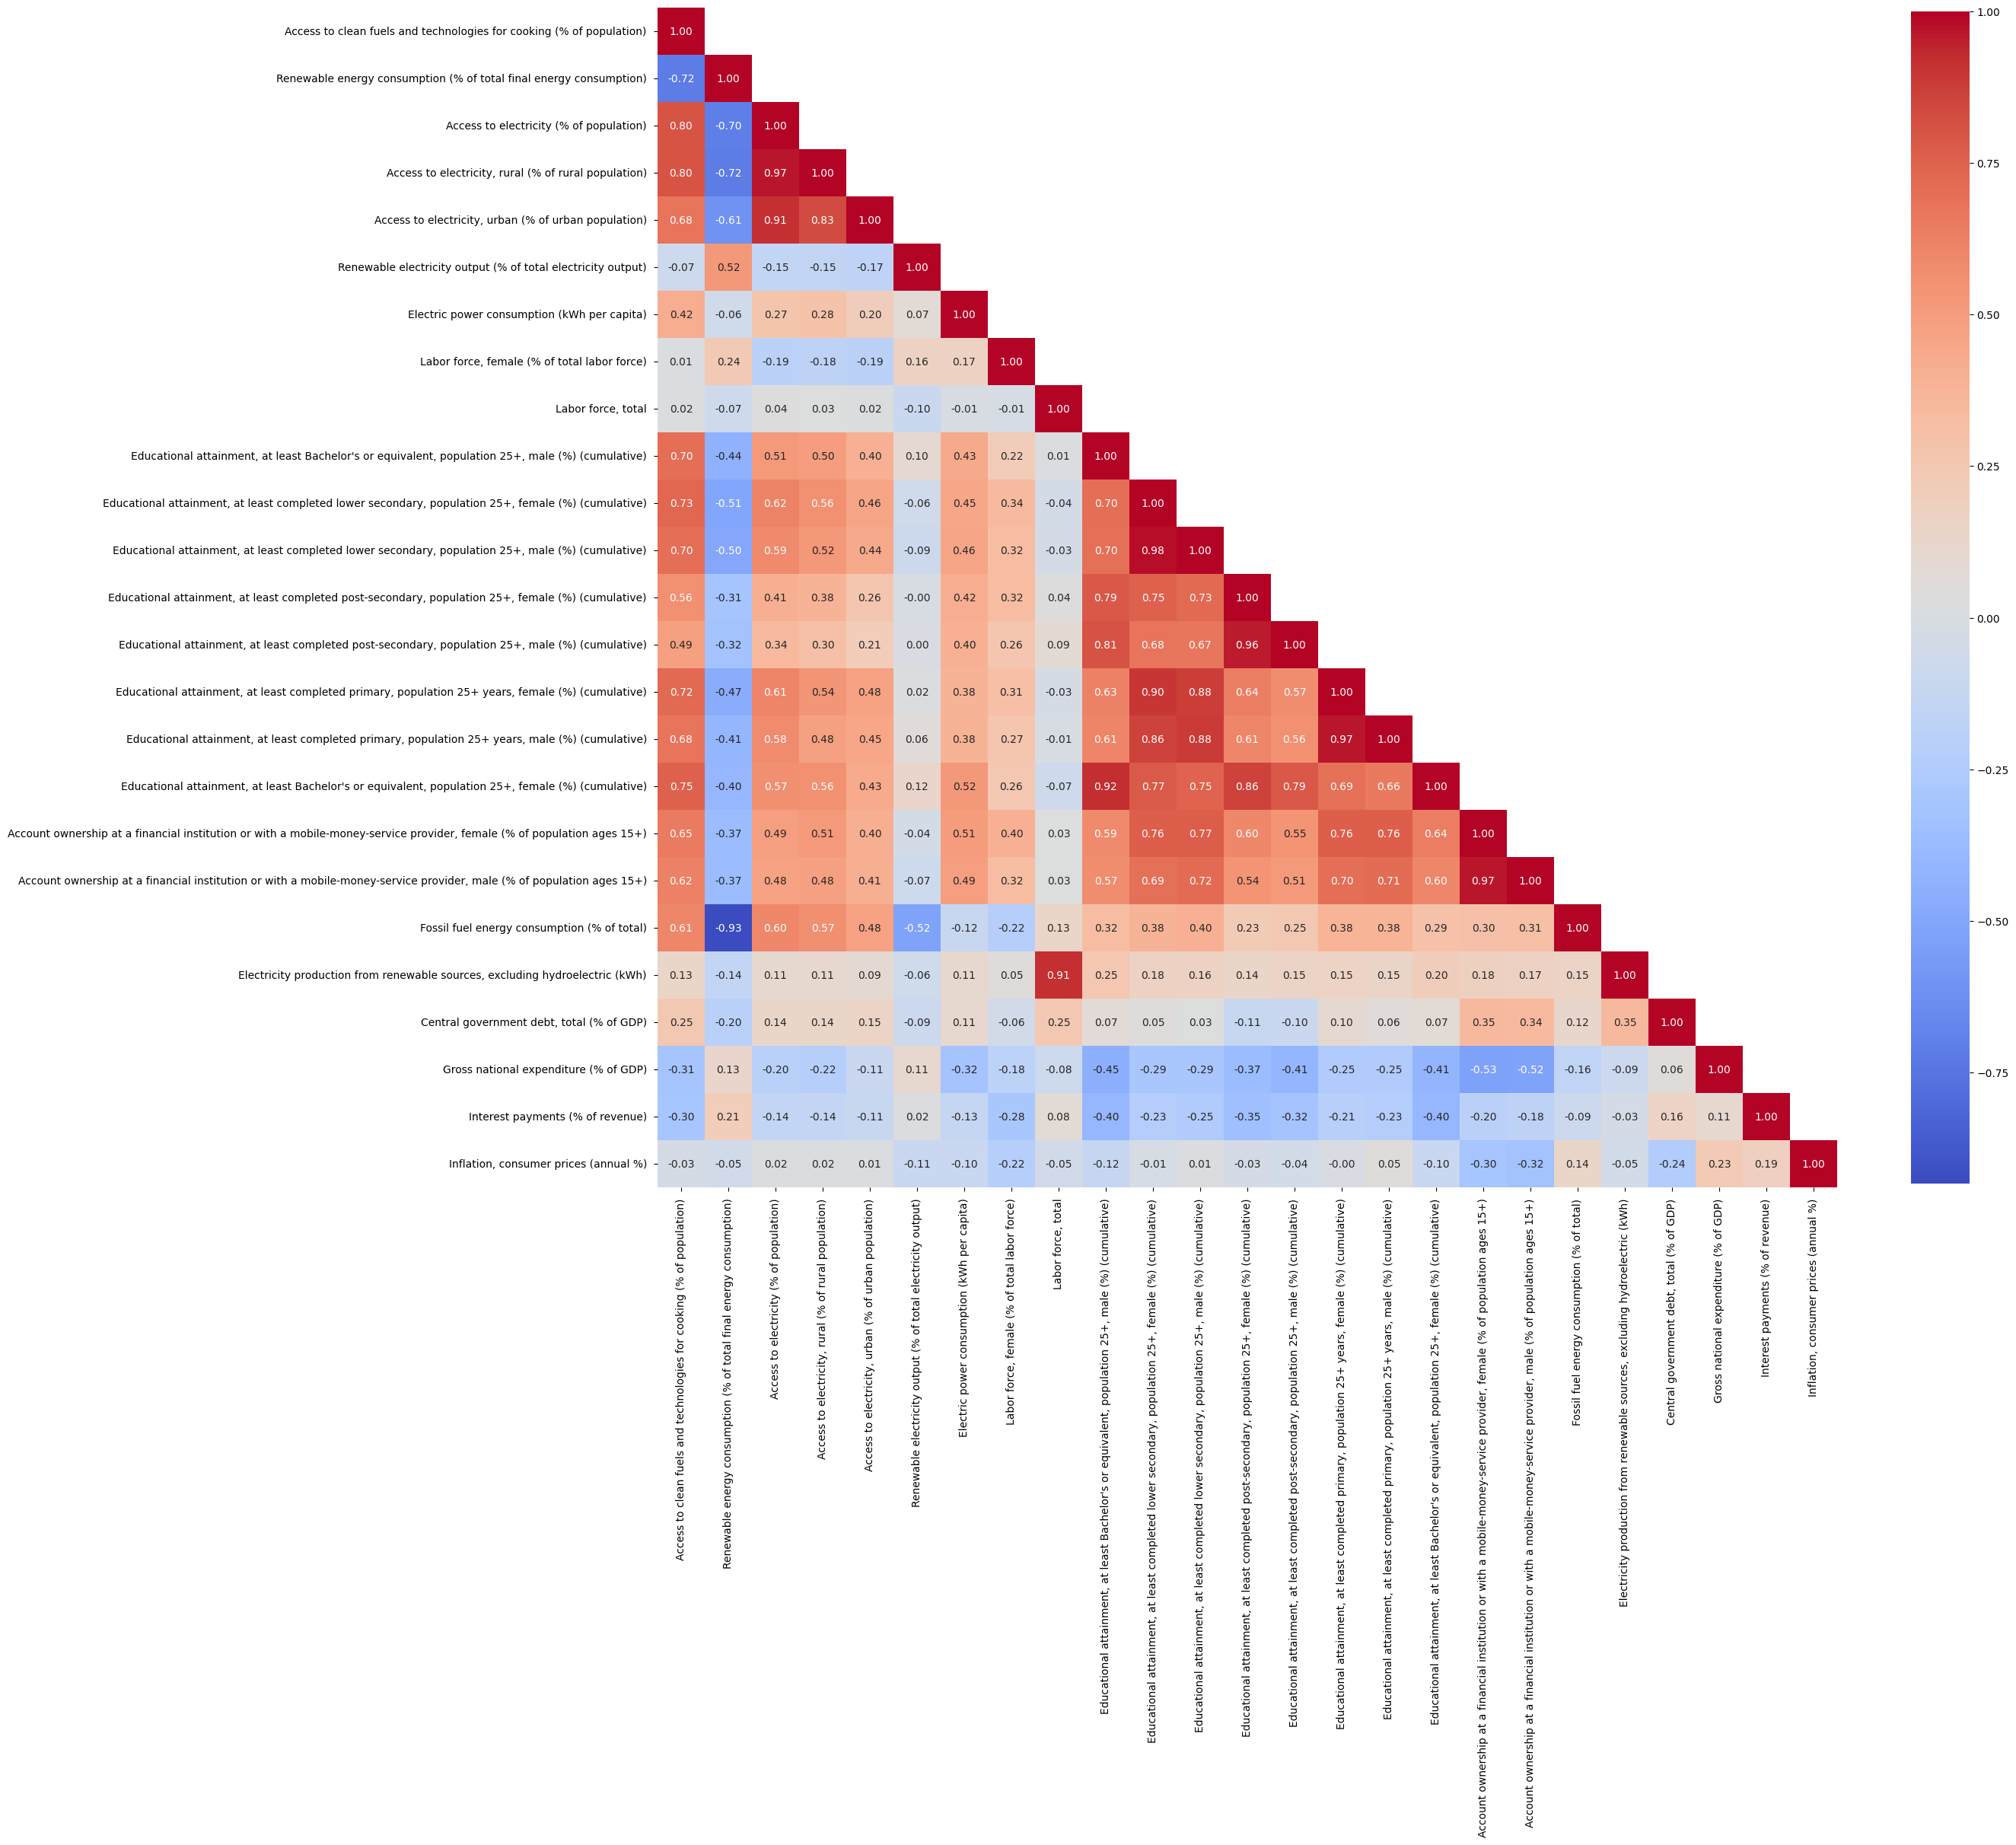

In [ ]:
# Selecting only numeric columns for correlation calculation
numericColumns = AdditionalDF.select_dtypes(include=['float64', 'int64'])
correlationMatrix = numericColumns.corr()

matrix = np.triu(correlationMatrix.corr(), k=1)

plt.figure(figsize=(25, 25))
sns.heatmap(correlationMatrix, mask= matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

In [ ]:
#determning highly correlated columns with threshold of 0.9 or -0.9
#Setting a threshold for correlation
correlationThreshold = 0.90
highCorrelatedColumns = set()
for i in range (len(correlationMatrix.columns)):
    for j in range(i):
        if abs(correlationMatrix.iloc[i, j]) > correlationThreshold:
            colname = correlationMatrix.columns[i]
            highCorrelatedColumns.add(colname)

# Displaying the highly correlated columns as a list
print("Highly correlated columns:")
for col in highCorrelatedColumns:
    print(col)
          


Highly correlated columns:
Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative) 
Fossil fuel energy consumption (% of total) 
Electricity production from renewable sources, excluding hydroelectric (kWh) 
Access to electricity, rural (% of rural population) 
Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative) 
Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative) 
Access to electricity, urban (% of urban population) 
Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative) 
Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+) 


In [ ]:
#dropping columns with high correlation
AdditionaldfNEW = AdditionalDF.drop(columns=['Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)', 
'Fossil fuel energy consumption (% of total)', 'Electricity production from renewable sources, excluding hydroelectric (kWh)', 
'Access to electricity, rural (% of rural population)', 'Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)', 
'Access to electricity, urban (% of urban population)','Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)'], errors='ignore')

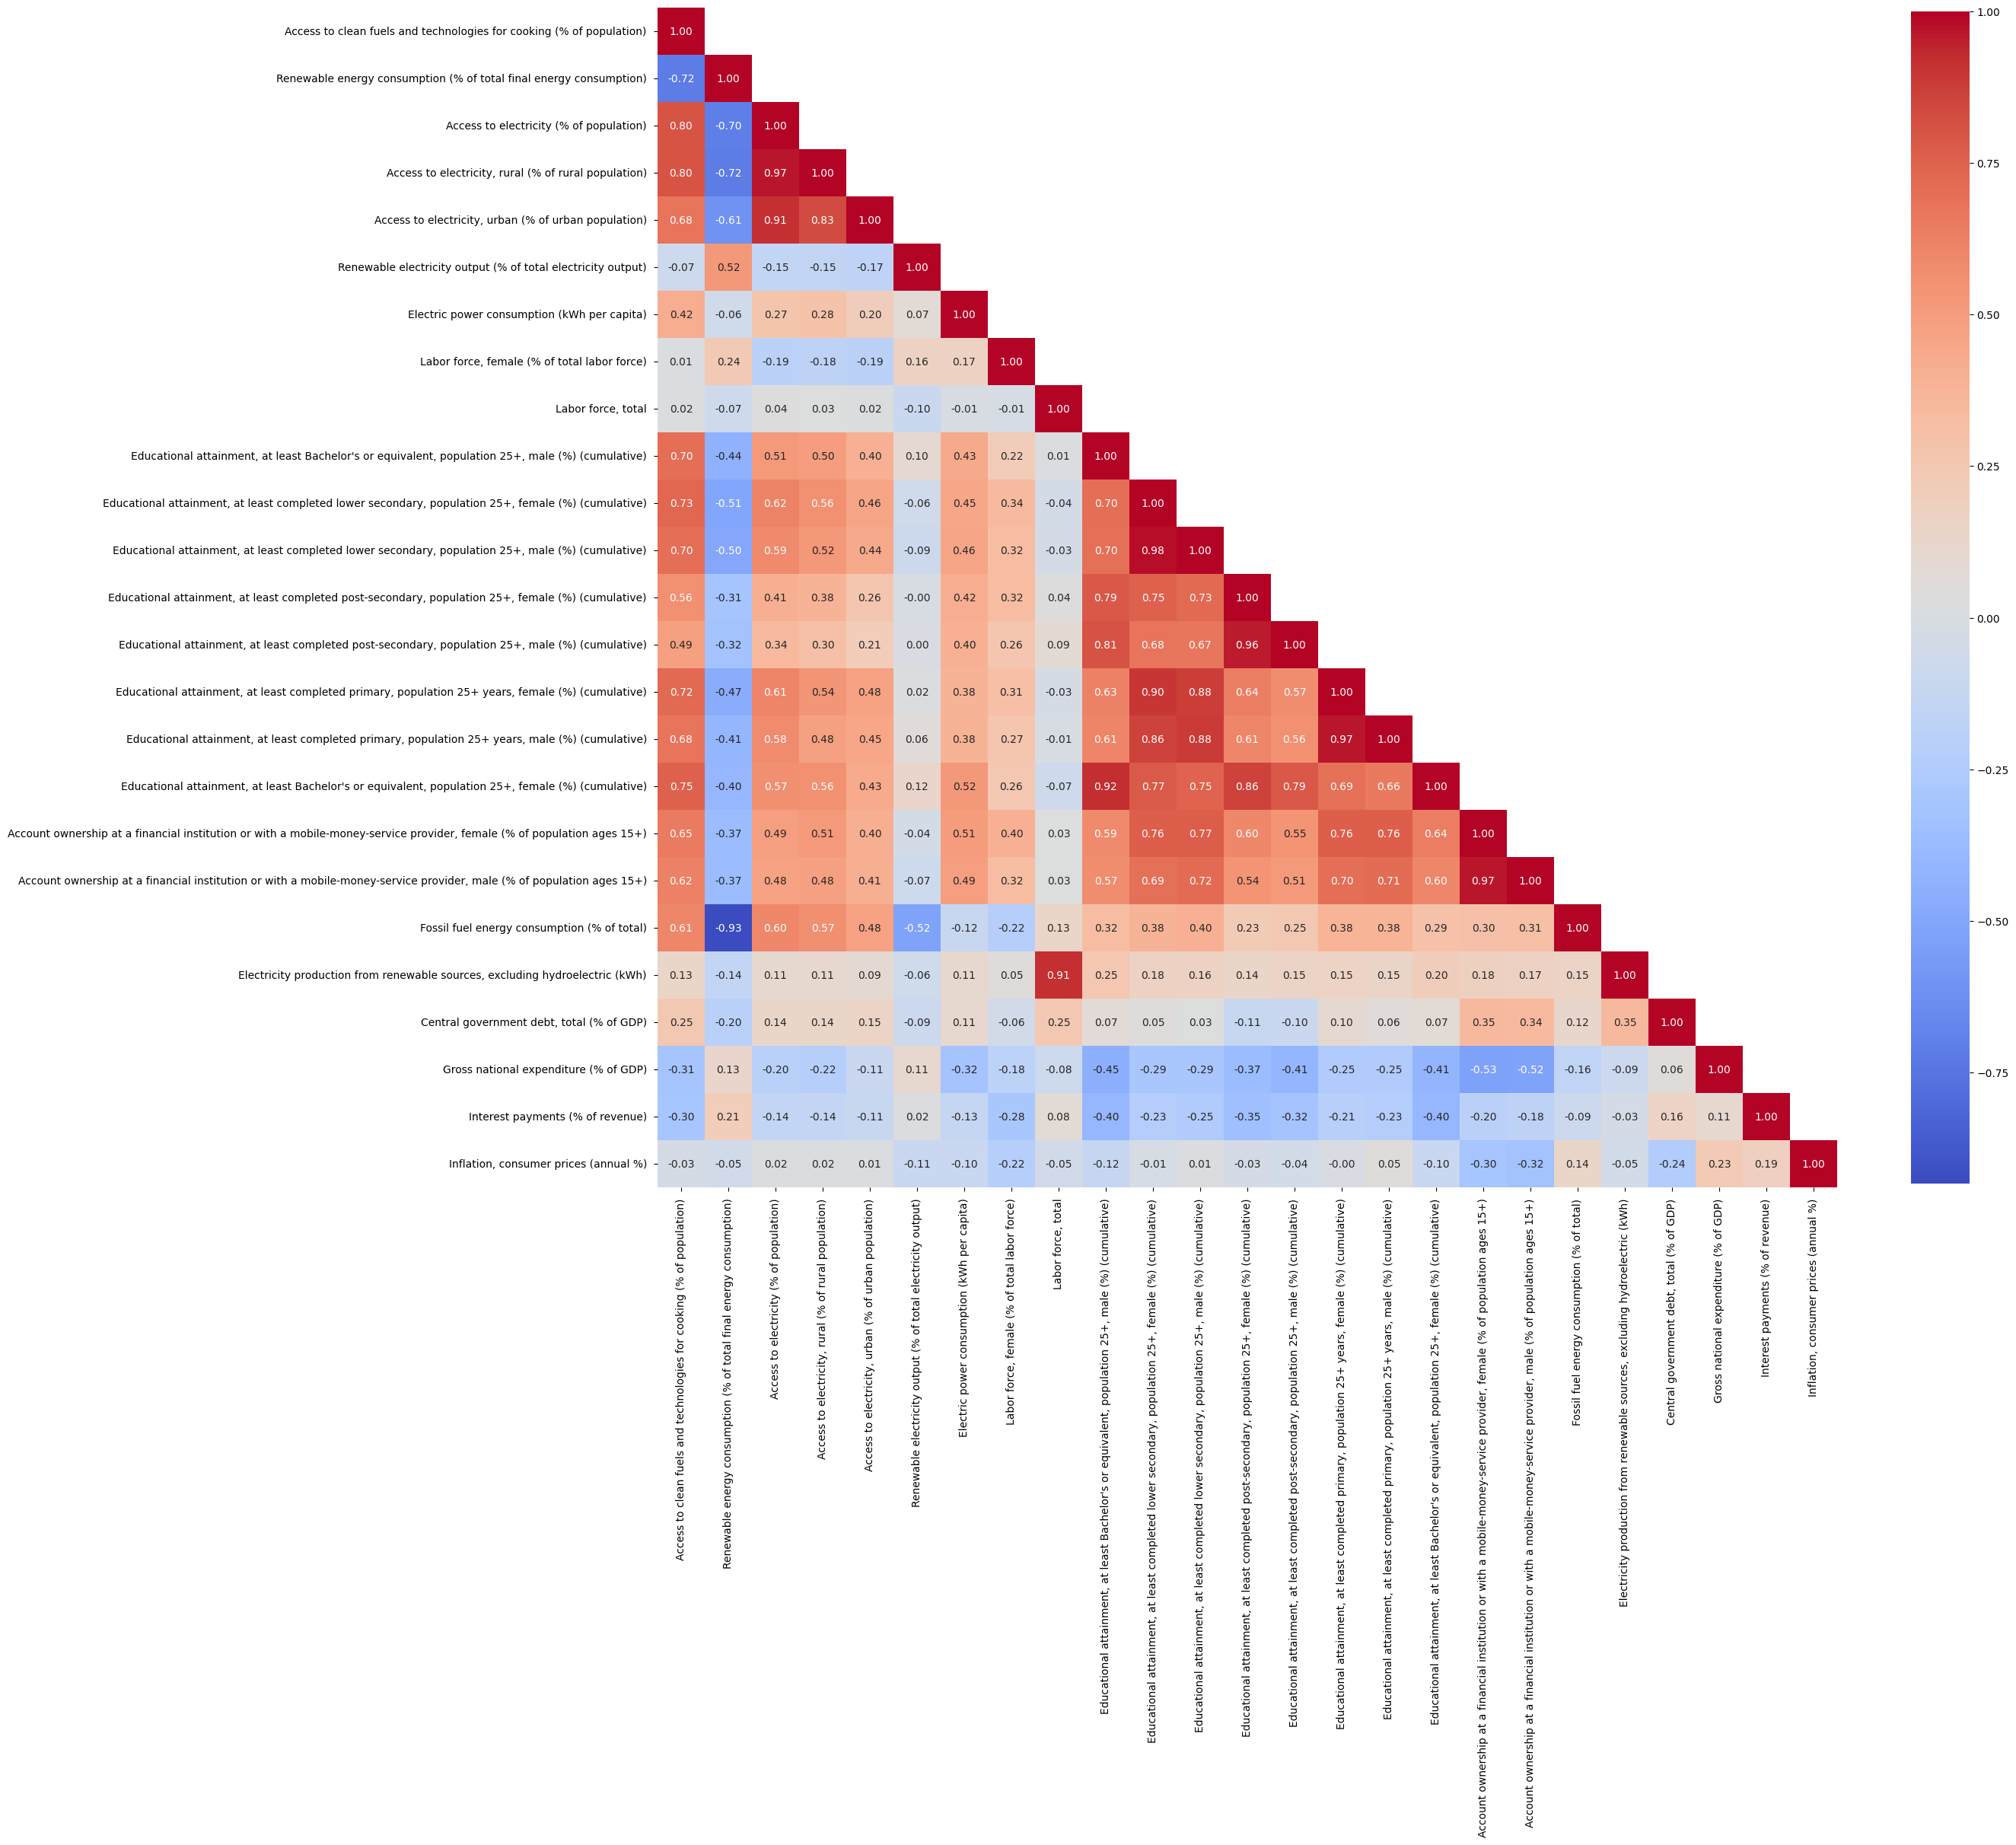

In [ ]:
# Selecting only numeric columns for correlation calculation
numericColumns2 = AdditionaldfNEW.select_dtypes(include=['float64', 'int64'])
correlationMatrix2 = numericColumns2.corr()

#adding a mask to the upper triangle of the correlation matrix
matrix = np.triu(correlationMatrix2.corr(), k=1)

#pltting the graph
plt.figure(figsize=(25, 25))
sns.heatmap(correlationMatrix2, mask= matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

In [67]:
#convert AdditionalDF into csv for download
# Export EconomicData106 as a CSV file
AdditionalDF.to_csv('AdditionalDF.csv', index=False)


In [68]:
AdditionalDF.shape

(318, 27)